In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models, optimizers, losses, callbacks,\
                             regularizers, datasets
from keras.utils import to_categorical
from tensorflow.keras.models import load_model

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# loading the data
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Group_Project_Data/Train",
    image_size=(64, 64),
    color_mode="grayscale"
)

Found 6000 files belonging to 2 classes.


In [5]:
# loading the data
valid_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Group_Project_Data/Valid",
    image_size=(64, 64),
    color_mode="grayscale"
)

Found 2000 files belonging to 2 classes.


In [6]:
# to determine which number between 0 and 1 that represents each class - Real images and Fake images
data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Group_Project_Data/Train")
data_iterator = data.as_numpy_iterator() #converts the data to numpy array

Found 6000 files belonging to 2 classes.


In [7]:
batch = data_iterator.next() # to take one batch at a time, then take the next

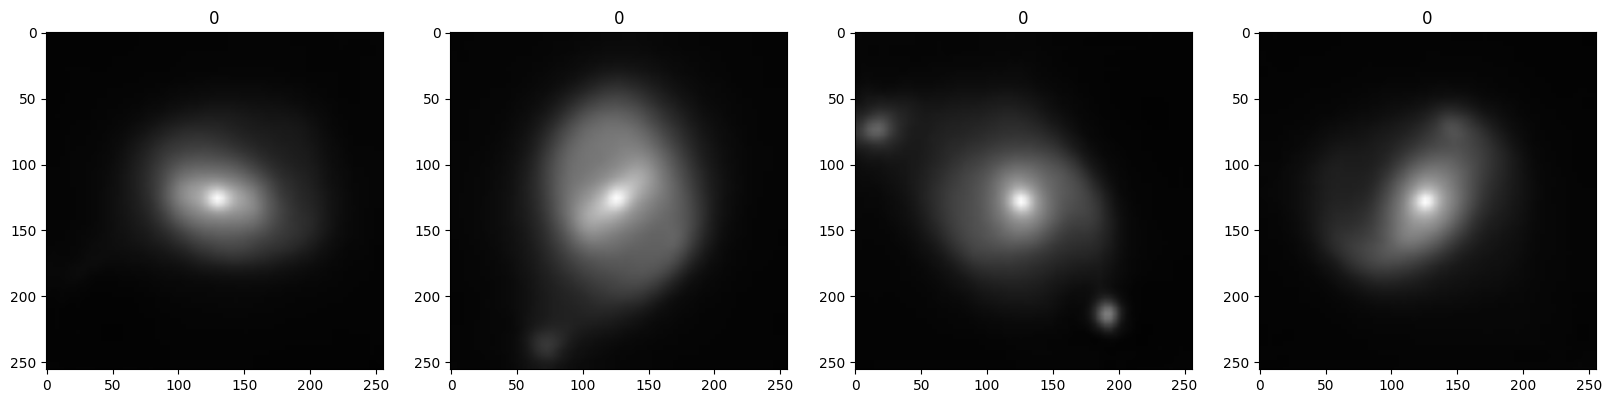

In [8]:
# plotting the class and labels; from the plot below, 1 represents the Real image class, 0 represents the Fake image class
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [9]:
# scaling the data to normalize
train_data = train_data.map(lambda x,y: (x/255, y))

In [10]:
valid_data = valid_data.map(lambda x,y: (x/255, y))

In [11]:
# splitting the training data to generate test data
train_data = train_data.take(round(0.8 * len(train_data)))
test_data = train_data.skip(round(0.8 * len(train_data)))

In [12]:
train_size = int(len(train_data))
val_size = int(len(valid_data))

In [13]:
train = train_data.take(train_size)
val = valid_data.take(val_size)

In [14]:
image_model = tf.keras.Sequential([
    layers.Conv2D(64, 3, activation="relu", padding="same", input_shape=(64, 64, 1)),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

In [15]:
image_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
image_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 256)        0

In [17]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",  # Stop training when validation loss does not improve
    patience=3,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True,  # Restore the best model weights when training stops
)


In [18]:
history = image_model.fit(
    train, 
    epochs=100,
    validation_data=val,
    callbacks=[early_stopping],
)

Epoch 1/100
150/150 [==============================] - 256s 2s/step - loss: 0.0963 - accuracy: 0.9571 - val_loss: 0.0113 - val_accuracy: 0.9960
Epoch 2/100
150/150 [==============================] - 5s 32ms/step - loss: 0.0034 - accuracy: 0.9990 - val_loss: 3.9253e-04 - val_accuracy: 1.0000
Epoch 3/100
150/150 [==============================] - 5s 31ms/step - loss: 0.0654 - accuracy: 0.9819 - val_loss: 0.0078 - val_accuracy: 0.9965
Epoch 4/100
150/150 [==============================] - 5s 33ms/step - loss: 0.0036 - accuracy: 0.9985 - val_loss: 6.3215e-04 - val_accuracy: 0.9995
Epoch 5/100
150/150 [==============================] - 5s 30ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 6.7980e-04 - val_accuracy: 0.9995


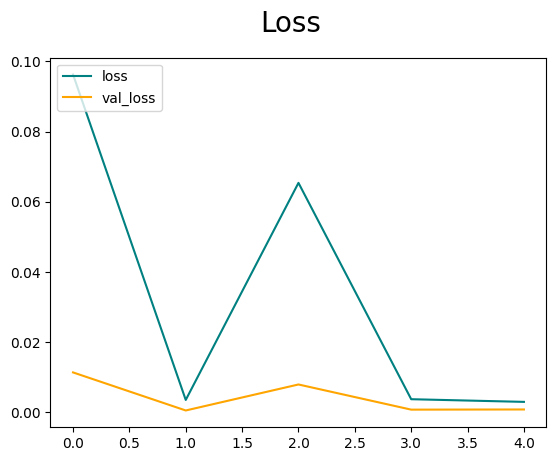

In [19]:
#plotting the loss
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

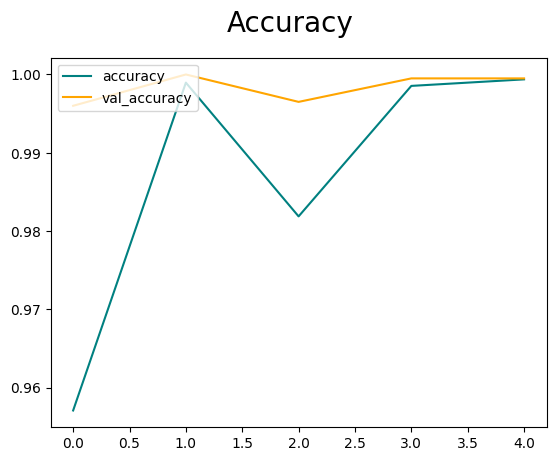

In [20]:
#plotting the accuracy
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [21]:
# Extract test data and labels
X_test = []
y_test = []
for images, labels in test_data:
    X_test.append(images.numpy())
    y_test.append(labels.numpy())

# Concatenate test data and labels
test_images = np.concatenate(X_test, axis=0)
test_labels = np.concatenate(y_test, axis=0)

# Unpack image/data and labels/targets
X_train, y_train = next(iter(train_data))
X_test, y_test = next(iter(valid_data))

1/1 [==============================] - 0s 163ms/step


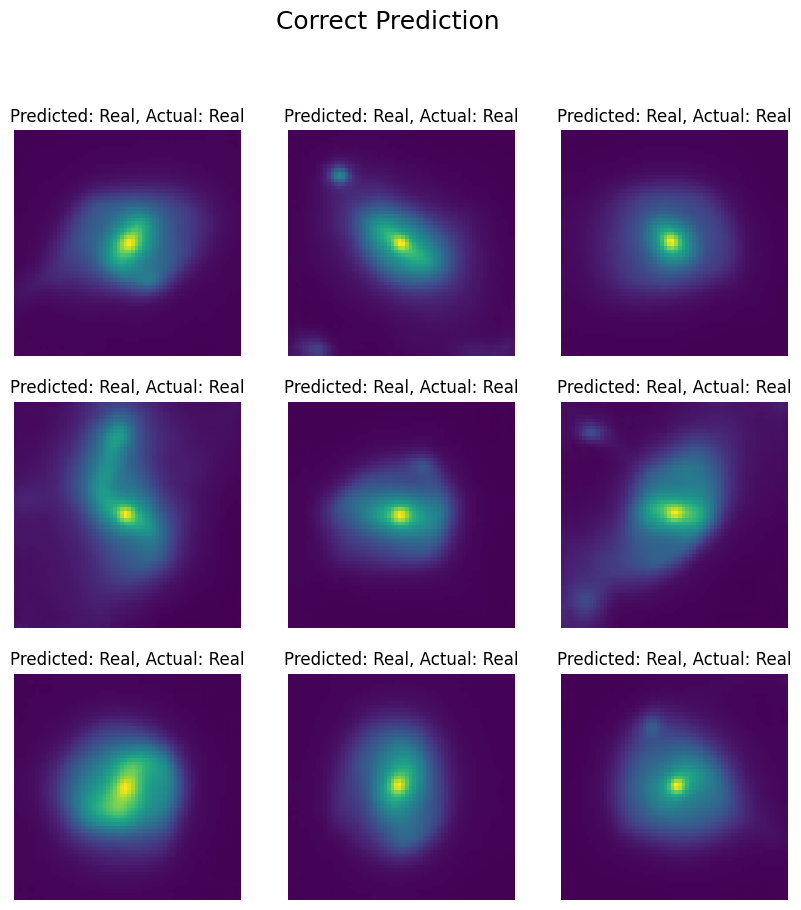

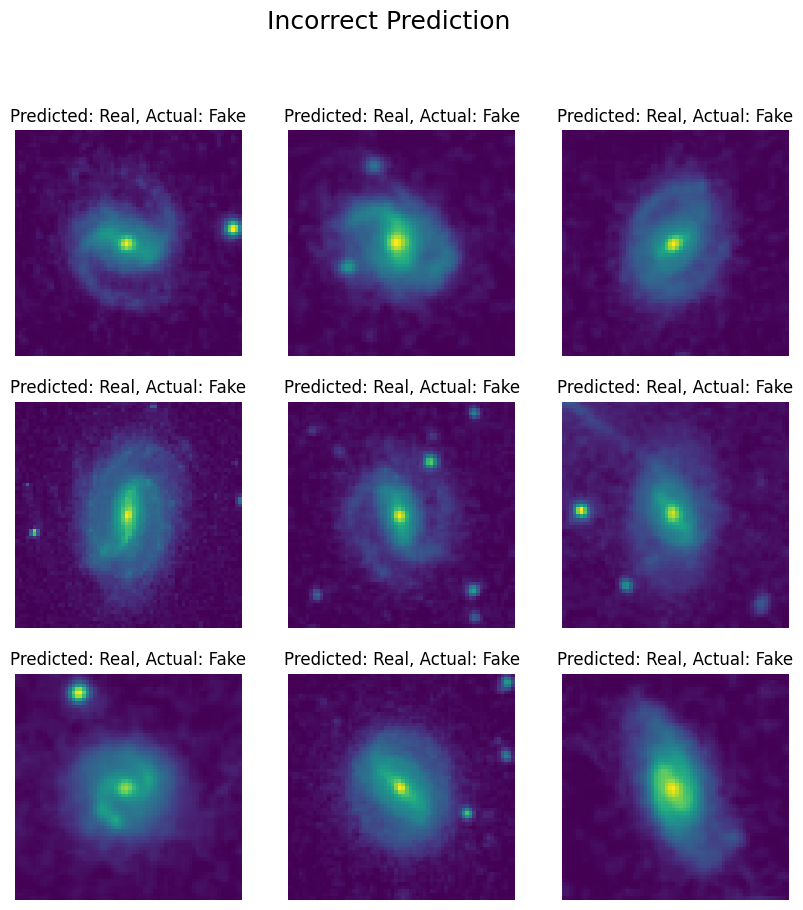

In [22]:
#check for correct and incorrect labeling

class_names = ['Real', 'Fake']

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 2) 
y_test = to_categorical(y_test, 2)  

# Make predictions on the test set
y_pred = image_model.predict(X_test)

# Convert the predicted probabilities into class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert the true labels from one-hot encoding to class labels
y_test_classes = np.argmax(y_test, axis=1)

correct_indices = np.where(y_pred_classes == y_test_classes)[0]
incorrect_indices = np.where(y_pred_classes != y_test_classes)[0]

# Plot correctly classified images
plt.figure(figsize=(10,10))
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct])
    plt.title("Predicted: {}, Actual: {}".format(class_names[y_pred_classes[correct]], class_names[y_test_classes[correct]]))
    plt.suptitle('Correct Prediction', y=1.0, fontsize=18)
    plt.axis('off')
plt.show()

# Plot incorrectly classified images
plt.figure(figsize=(10,10))
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect])
    plt.title("Predicted: {}, Actual: {}".format(class_names[y_pred_classes[incorrect]], class_names[y_test_classes[incorrect]]))
    plt.suptitle('Incorrect Prediction', y=1.0, fontsize=18)
    plt.axis('off')
plt.show()

In [23]:
# Evaluate the model on the test data
test_loss, test_accuracy = image_model.evaluate(test_data)

# Print the test loss and accuracy
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

30/30 [==============================] - 3s 21ms/step - loss: 1.5794e-04 - accuracy: 1.0000
Test loss: 0.0001579389936523512
Test accuracy: 1.0


In [24]:
import numpy as np

# Predict the class probabilities on the test data
y_pred_prob = image_model.predict(test_data)

# Convert the probabilities to class labels using a threshold value of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Define the class names
class_names = ['Real', 'Fake']

# Print the classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels, y_pred, target_names=class_names))
print(confusion_matrix(test_labels, y_pred))

30/30 [==============================] - 3s 20ms/step
              precision    recall  f1-score   support

        Real       0.51      0.51      0.51       491
        Fake       0.49      0.49      0.49       469

    accuracy                           0.50       960
   macro avg       0.50      0.50      0.50       960
weighted avg       0.50      0.50      0.50       960

[[250 241]
 [241 228]]
